In [4]:
import pandas as pd
import numpy as np
import os

class trainData():

    def __init__(self):

        self.current_folder_path = os.getcwd()
        self.parent_folder_path = os.path.dirname(self.current_folder_path)
        self.data_save_path = os.path.join(self.parent_folder_path, 'generated_data')

    def addDatatoPath(self,path):
        return os.path.join(self.data_save_path,path)
    
    def readData(self,string):
        print(string)
        df = pd.read_feather(string)
        if "time" in df.columns :
            df = df.drop(columns = {'time'})

        self.df = df.drop(index=0)

    def splitData(self):
        df = self.df
        df['label'] = df['label'].str.replace(' ', '')

        # Split the dataset based on labels
        # labels = ['Bias', 'Drift', 'Gain', 'NoFault', 'Outliers', 'Precisiondegradation']
        labels = ['Bias', 'Drift', 'Gain', 'Precisiondegradation', 'NoFault']
        self.datasets = {}
        self.dataframes =[]

        for label in labels:
            
            self.datasets[label] = df[df['label'] == label]

            globals()[f'df_{label}'] = self.datasets[label]
            self.dataframes.append(f'df_{label}')
            # self.datasets[label].to_csv(self.data_save_path + "/withNoFault/" +f'df_{label}.csv', index=False)

        try:
            print("Size of df_Bias:", df_Bias.shape)
            print("Size of df_Drift:", df_Drift.shape)
            print("Size of df_Gain:", df_Gain.shape)
            print("Size of df_NoFault:", df_NoFault.shape)
            # print("Size of df_Outliers:", df_Outliers.shape)
            print("Size of df_PrecisionDegredatation:", df_Precisiondegradation.shape)

        except:
            pass

    def split_column_into_rows(self, df, num_columns, overlapping_ratio):
        
        values = df['value'].to_numpy()  

        overlapping_elements = int(num_columns * overlapping_ratio / 100)

        row_elements = num_columns - overlapping_elements

        num_rows = (len(values) + row_elements - 1) // row_elements

        last_row_fill = (num_rows * num_columns) - len(values)

        values = np.pad(values, (0, last_row_fill), mode='constant', constant_values=0)

        new_values = np.zeros((num_rows, num_columns))
        for i in range(num_rows):
            start = i * row_elements
            end = start + num_columns
            new_values[i] = values[start:end]

        new_df = pd.DataFrame(new_values)

        label_name = df.at[0, 'label']
        new_df.insert(0,'label',label_name)

        return new_df
    
    def mergeData(self):
        self.train_data = pd.DataFrame()
        
        for key in self.datasets.keys():

            df = self.datasets[key]
            df = df.reset_index(drop=True, inplace=False)
            df = self.split_column_into_rows(df,self.sampleSize,self.overlapRatio)
            df = df.drop(df.index[-1])
            df.to_csv(self.data_save_path + "/withNoFault/"  + f'df_{key}.csv', index=False)
            #self.train_data = pd.concat([self.train_data,df])

        #self.train_data = self.train_data.reset_index(drop=True, inplace=False)

        #print('train data shape: ' , self.train_data.shape)
        #return self.train_data

    def convert_labels_to_integers(self):
        unique_labels = self.train_data['label'].unique()
        label_to_integer = {label: i+1 for i, label in enumerate(unique_labels)}
        self.train_data['label'] = self.train_data['label'].map(label_to_integer)
        
        for label, integer in label_to_integer.items():
            print(f"Label '{label}' changed to integer '{integer}'")
        
        return self.train_data

    def prepareOutput(self):
        
        train_labels = self.train_data['label'].values
        train_data_values = self.train_data.drop(columns={'label'})

        trainName = 'train_data_values_less' + str(self.sampleSize) + "_" + str(self.overlapRatio)
        labelName = 'train_labels_less' + str(self.sampleSize) + "_" + str(self.overlapRatio)
        trainName = self.addDatatoPath(trainName)
        labelName = self.addDatatoPath(labelName)
        
        train_data_values.to_pickle(trainName)
        train_labels = pd.DataFrame(train_labels)
        train_labels.to_pickle(labelName)

        print(train_data_values.shape)
        print(train_labels.shape)

        return train_data_values, train_labels
    
    def prepareTrainData(self, sampleSize, overlapRatio, path):
        self.sampleSize = sampleSize
        self.overlapRatio = overlapRatio
        self.feather_path = os.path.join(self.data_save_path, path)
        self.readData(self.feather_path)
        self.splitData()
        self.mergeData()
        # self.convert_labels_to_integers()
        # train_data_values, train_labels = self.prepareOutput()
        # return train_data_values, train_labels

In [5]:
sampleSize = 300
overlapRatio = 10
path_train = "df_f_feather"
path_test = "test_df"

train = trainData()


train.prepareTrainData(sampleSize, overlapRatio, path_train)



c:\Users\UTKU\OneDrive\Desktop\MS-Term4\ProjectArbeit\generated_data\df_f_feather
Size of df_Bias: (184700, 2)
Size of df_Drift: (184701, 2)
Size of df_Gain: (184701, 2)
Size of df_NoFault: (184177, 2)
Size of df_PrecisionDegredatation: (184701, 2)


In [6]:
df_Bias = pd.read_csv("withNoFault/df_Bias.csv")
df_Drift = pd.read_csv("withNoFault/df_Drift.csv")
df_Gain = pd.read_csv("withNoFault/df_Gain.csv")
df_PrecisionDegradation = pd.read_csv("withNoFault/df_PrecisionDegradation.csv")
df_NoFault = pd.read_csv("withNoFault/df_NoFault.csv")

df_Bias = df_Bias.iloc[:-1]
df_Drift = df_Drift.iloc[:-1]
df_Gain = df_Gain.iloc[:-1]
df_PrecisionDegradation = df_PrecisionDegradation.iloc[:-1]
df_NoFault = df_NoFault.iloc[:-1]

In [7]:
df_Bias_labels = df_Bias['label'].values
df_Bias_values = df_Bias.drop(columns=['label'])

df_Drift_labels = df_Drift['label'].values
df_Drift_values = df_Drift.drop(columns=['label'])

df_Gain_labels = df_Gain['label'].values
df_Gain_values = df_Gain.drop(columns=['label'])

df_PrecisionDegradation_labels = df_PrecisionDegradation['label'].values
df_PrecisionDegradation_values = df_PrecisionDegradation.drop(columns=['label'])

df_NoFault_labels = df_NoFault['label'].values
df_NoFault_values = df_NoFault.drop(columns=['label'])


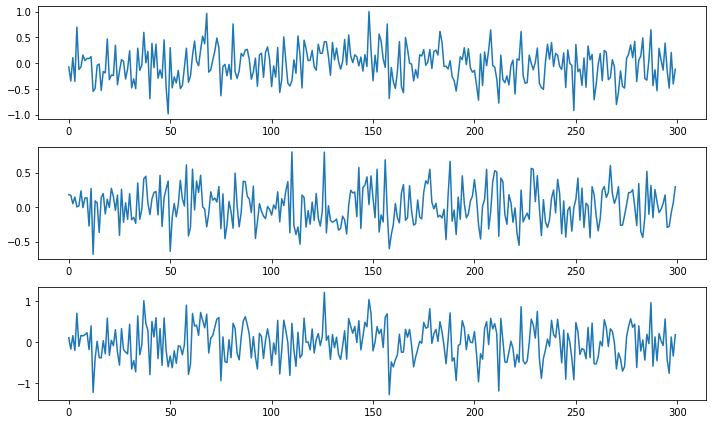

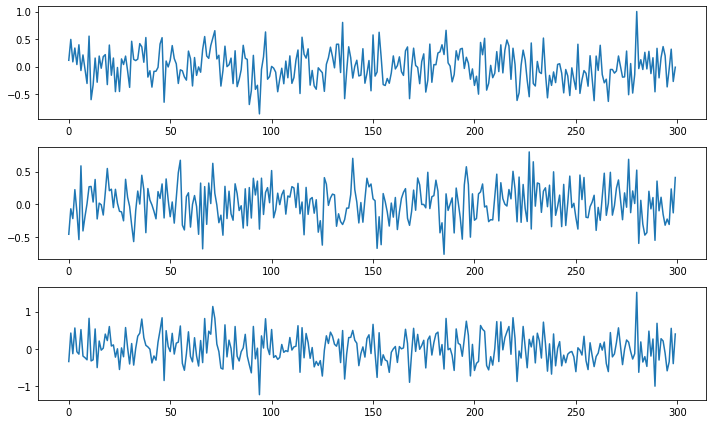

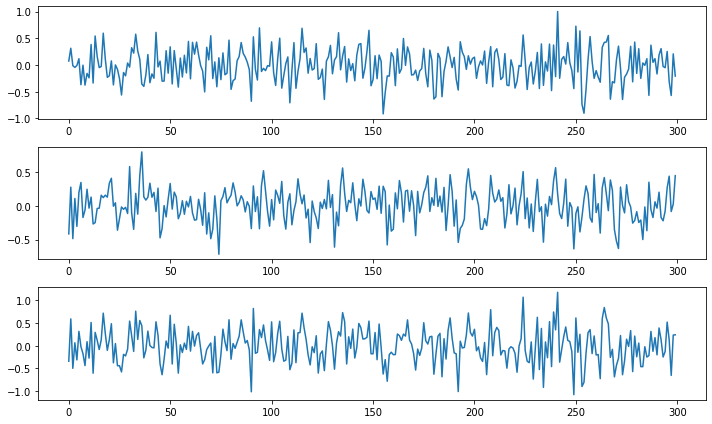

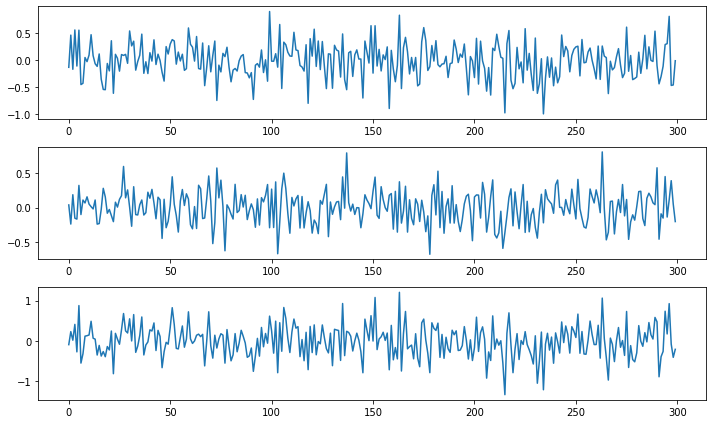

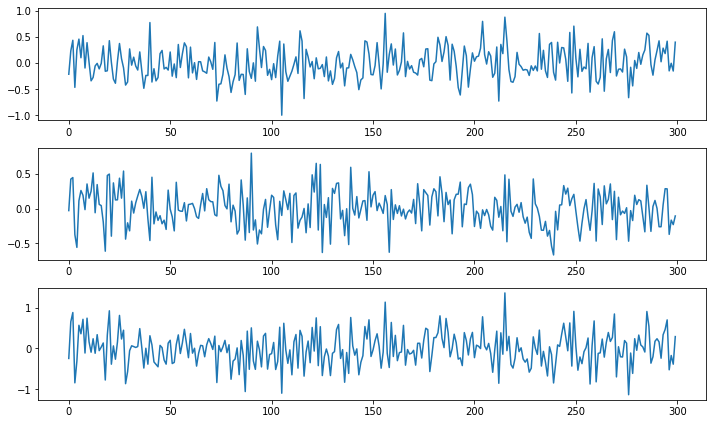

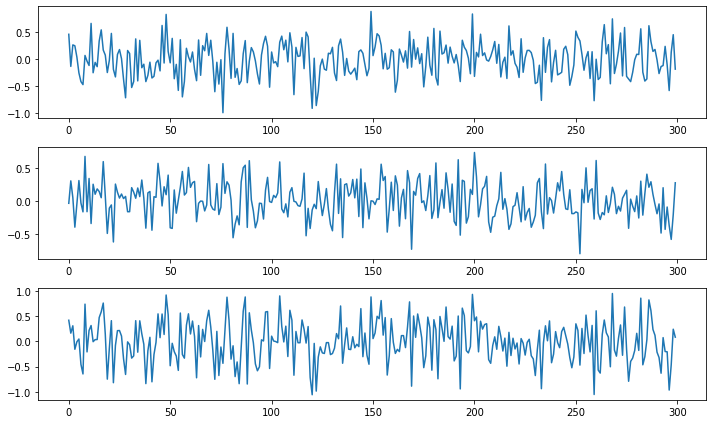

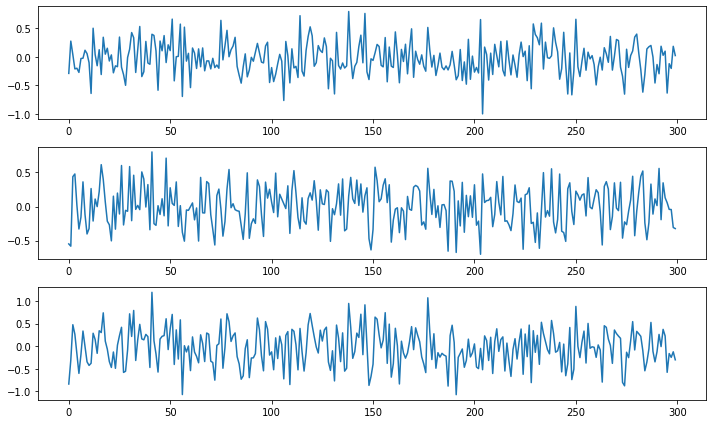

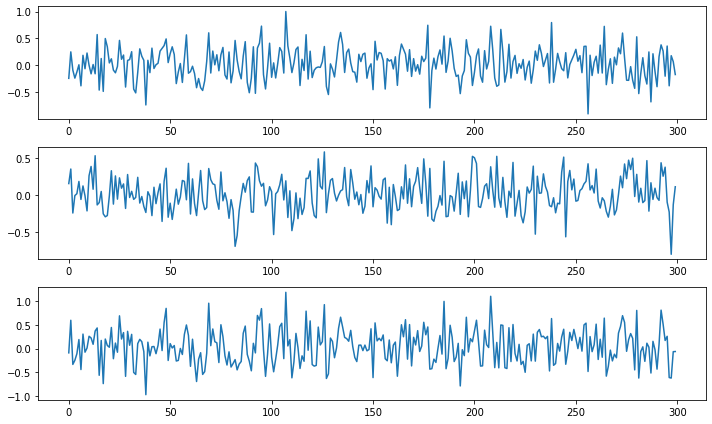

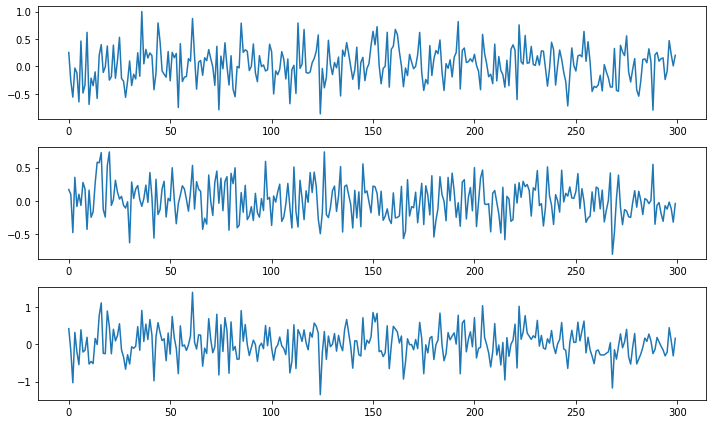

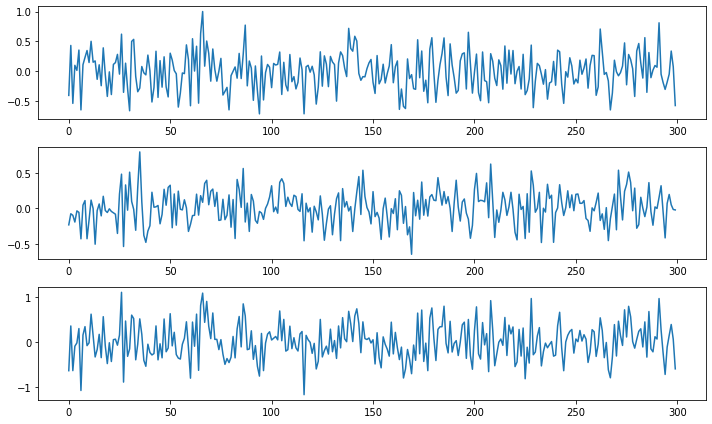

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.DataFrame(np.random.randn(100, 300))
df2 = pd.DataFrame(np.random.randn(100, 300))

signal_length = df1.shape[1]

random_indices = np.random.choice(range(len(df1)), size=10, replace=False)

for idx in random_indices:
    signal1 = df1.iloc[idx].values
    signal2 = df2.iloc[idx].values

    signal1 /= np.max(np.abs(signal1))
    signal2 /= np.max(np.abs(signal2))

    # level_adjustment = 0.8
    # signal2 *= level_adjustment

    mixed_signal = signal1 + signal2

    plt.figure(figsize=(10, 6))
    plt.subplot(3, 1, 1)
    plt.plot(signal1)
    plt.subplot(3, 1, 2)
    plt.plot(signal2)
    plt.subplot(3, 1, 3)
    plt.plot(mixed_signal)
    plt.tight_layout()
    plt.show()


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def z_normalize(signal):
    mean = np.mean(signal)
    std = np.std(signal)
    return (signal - mean) / std


def signalMixer(df1, df2, label):

    final_array = []
    label_array = []

    for idx in range(len(df1)):

        signal1 = df1.iloc[idx].values
        signal2 = df2.iloc[idx].values

        # plt.figure(figsize=(10, 6))
        # plt.subplot(3, 1, 1)
        # plt.plot(signal1)
        # plt.title('Signal 1')
        # plt.subplot(3, 1, 2)
        # plt.plot(signal2)
        # plt.title('Signal 2')
        # plt.subplot(3, 1, 3)
        # plt.tight_layout()
        # plt.show()

        signal1 = z_normalize(signal1)
        signal2 = z_normalize(signal2)

        # level_adjustment = 0.8
        # signal2 *= level_adjustment

        mixed_signal = signal1 + signal2
        final_array.append(mixed_signal)
        label_array.append(label)
        # plt.figure(figsize=(10, 6))
        # plt.subplot(3, 1, 1)
        # plt.plot(signal1)
        # plt.title('Signal 1')
        # plt.subplot(3, 1, 2)
        # plt.plot(signal2)
        # plt.title('Signal 2')
        # plt.subplot(3, 1, 3)
        # plt.plot(mixed_signal)
        # plt.title('Mixed Signal')
        # plt.tight_layout()
        # plt.show()
    return final_array, label_array
    




In [55]:
array = [[1,5,4,6,10]]
array1 = [[1,5,4,6,10]]

array = array + array1

print(len(array))

2


In [14]:
bias_drift, bias_drift_label = signalMixer(df_Bias_values, df_Drift_values, [1,1,0,0])

C:\Users\UTKU\AppData\Local\Temp\ipykernel_2364\1840509966.py:8: RuntimeWarning: invalid value encountered in true_divide
  return (signal - mean) / std


In [18]:
len(df_Bias_values)

184699

In [17]:
df_Bias_values

,value
0,-0.900545
1,-0.899803
2,-0.902359
3,-0.899715
4,-0.901006
...,...
184694,-0.901045
184695,-0.900633
184696,-0.900464
184697,-0.900157


In [12]:
labels1 = ['Bias','Drift','Gain','Precisiondegradation','NoFault']

bias_drift, bias_drift_label = signalMixer(df_Bias_values, df_Drift_values, [1,1,0,0,0])
bias_gain, bias_gain_label = signalMixer(df_Bias_values, df_Gain_values, [1,0,1,0,0])
bias_pd, bias_pd_label = signalMixer(df_Bias_values, df_PrecisionDegradation_values, [1,0,0,1,0])
drift_gain, drift_gain_label = signalMixer(df_Gain_values, df_Drift_values, [0,1,1,0,0])
drift_pd, drift_pd_label = signalMixer(df_PrecisionDegradation_values, df_Drift_values, [0,1,0,1,0])
gain_pd, gain_pd_label = signalMixer(df_Gain_values, df_PrecisionDegradation_values, [0,0,1,1,0])


mixed_train_data = bias_drift + bias_gain + bias_pd + drift_gain + drift_pd + gain_pd
mixed_label_data = bias_drift_label + bias_gain_label + bias_pd_label + drift_gain_label + drift_pd_label + gain_pd_label
len(mixed_label_data)

C:\Users\UTKU\AppData\Local\Temp\ipykernel_2364\2932070635.py:8: RuntimeWarning: invalid value encountered in true_divide
  return (signal - mean) / std


KeyboardInterrupt: 

In [34]:
len(mixed_train_data)

4098

In [64]:
label_df = pd.DataFrame(mixed_label_data)
data_df = pd.DataFrame(mixed_train_data)
# mixed_train_data.to_csv('mixed_train_data')

In [65]:
label_df.to_pickle('mixed_label_data')
data_df.to_pickle('mixed_train_data')

In [ ]:
# data_path = "/content/drive/MyDrive/ProjectArbeit/train_data_values_300_10"
# label_path = "/content/drive/MyDrive/ProjectArbeit/train_labels_300_10"
# test_data_path = "/content/drive/MyDrive/ProjectArbeit/test_data_values_300_10"
# test_label_path = "/content/drive/MyDrive/ProjectArbeit/test_labels_300_10"
# model_path = "/content/drive/MyDrive/ProjectArbeit/models"

In [35]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Example data
data = mixed_train_data

labels = mixed_label_data

# Reshape data to (num_samples, sequence_length, num_features)
data = data[:, :, np.newaxis]

# Split data into training and testing sets
split_index = int(0.8 * len(data))
x_train, y_train = data[:split_index], labels[:split_index]
x_test, y_test = data[split_index:], labels[split_index:]

def create_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(64, 3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='sigmoid'))  # Sigmoid activation for multilabel classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define input shape and number of classes
input_shape = x_train[0].shape
num_classes = y_train.shape[1]

# Create the model
model = create_cnn_model(input_shape, num_classes)

# Display the model summary
model.summary()

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=1, validation_data=(x_test, y_test))


TypeError: list indices must be integers or slices, not tuple